# Pengaruh Lokasi Populer, Harga, dan Fasilitas Terhadap Pilihan Customer di Airbnb Bangkok

# Latar Belakang

Airbnb adalah perusahaan asal Amerika yang menyediakan layanan pemesanan akomodasi berbasis online di berbagai kota dan destinasi wisata di seluruh dunia. Perusahaan ini menawarkan berbagai pilihan tempat tinggal kepada wisatawan yang mencari alternatif selain hotel tradisional.

# Permasalahan yang dihadapi
Airbnb ingin memahami faktor-faktor yang memengaruhi keputusan wisatawan dalam memilih akomodasi di Bangkok. Fokus utama adalah menentukan pengaruh lokasi populer, harga sewa, dan fasilitas akomodasi terhadap pilihan wisatawan. Informasi ini penting untuk membantu pemilik properti mengoptimalkan listing mereka, meningkatkan daya tarik bagi wisatawan, dan memaksimalkan pendapatan.

Sebagai data analyst, kita akan menjawab pertanyaan berikut:

## Bagaimana lokasi populer, harga, dan fasilitas memengaruhi keputusan wisatawan dalam memilih akomodasi di Airbnb Bangkok?

# Data

Kita mulai proses data cleaning dengan mengolah analisis deskriptif dari dataset [Airbnb Listings Bangkok](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Setelah mengimport libraries yang diperlukan, kita mulai untuk read data untuk analisa.

In [27]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Dataset ini terdiri dari 15.854 entri data yang mencakup 17 kolom, dengan tipe data yang bervariasi, termasuk numerik, float, dan objek. Beberapa kolom dalam dataset ini memiliki missing values yang perlu diperhatikan, seperti kolom name yang memiliki 8 missing values, kolom host_name dengan 1 missing value, serta kolom last_review dan reviews_per_month yang masing-masing memiliki 5.790 missing values. Temuan ini menandakan perlunya langkah pembersihan data yang cermat sebelum melanjutkan ke tahap analisis lebih lanjut.

In [28]:
display(df.describe(), df.describe(include = object))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


Dataset Airbnb Bangkok ini mencakup 15.854 entri data, dengan harga sewa rata-rata sebesar 3.217,7 THB. Namun, harga sewa bervariasi secara signifikan, mulai dari 0 THB hingga 1.100.000 THB, menunjukkan adanya outliers yang mungkin perlu diperiksa lebih lanjut. Sebagian besar listing memiliki sedikit atau tidak ada ulasan, dengan median hanya 2 ulasan per listing, sementara rata-rata ketersediaan listing adalah sekitar 244 hari dalam setahun, menunjukkan bahwa banyak properti aktif tersedia sepanjang tahun.

Kemudian, terdapat sejumlah kolom yang memiliki variasi dan pola yang menarik. Sebagai contoh, nama listing memiliki 14.794 variasi unik, namun nama paling populer digunakan sebanyak 45 kali, menunjukkan potensi duplikasi atau properti yang serupa. Dari sisi wilayah, distrik Vadhana menjadi yang paling dominan dengan 2.153 listing, menandakan area ini sebagai hotspot utama di Bangkok. Selain itu, mayoritas listing menawarkan tipe kamar "Entire home/apt", dengan frekuensi mencapai 8.912 entri, yang menunjukkan preferensi penyewa untuk menyewa seluruh properti. Statistik ini memberikan pandangan awal yang penting tentang distribusi listing, popularitas wilayah, dan preferensi tipe kamar, yang dapat digunakan untuk analisis lebih lanjut.

Statistik ini memberikan gambaran awal yang penting tentang distribusi listing, popularitas wilayah, dan fasilitas atau preferensi tipe kamar, yang dapat digunakan untuk analisis lebih lanjut. Selanjutnya, mari kita lihat seperti apa tampilan dari 5 data awal dan terakhir dari dataset ini.

In [29]:
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Seperti yang kita ketahui, terdapat 15,854 jumlah baris dan 17 kolom pada dataset ini. Bisa kita lihat terdapat missing values yang ditulis sebagai "NaN" pada kolom "last_review" dan "reviews_per_month". Missing values pada kolom ini dapat diabaikan dengan melihat kolom "number_of_reviews" dari setiap entri, di mana jumlahnya adalah 0 yang berarti bahwa properti yang dipasarkan tidak pernah diulas. Selanjutnya, kita dapat menganalisis variasi dan keragaman data dalam setiap kolom dengan membuat tabel yang menampilkan jumlah nilai unik dan nilai-nilai unik tersebut untuk setiap kolom, di mana kita akan menghapus kolom `Unnamed: 0` karena tidak relevan.

In [30]:
#drop column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

pd.set_option('display.max_colwidth', 150)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
dfdesc1 = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unik', 'Data Unik'],
                     data=listItem)
dfdesc1

,Nama Kolom,Jumlah Nilai Unik,Data Unik
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042..."
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. ..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 2129668, 222005, 7045870, 9181769, 5171292, 263049, 9279712, 284095, 5153476, 302658, 9399478, 323158, 54..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimonpak, Athitaya, Jiraporn, Nol, Somsak, Tor, Jing, Mimi, Natcha, Srisuk, Piyakorn, Sue, Henry, Timo, ..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen, Rat Burana, Chatu Chak, Khlong San, Bang Rak, Phaya Thai, Sathon, Khlong Toei, Vadhana..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872, 13.69757, 13.68556, 13.82925, 13.81693, 13.7204, 13.71934, 13.77486, 13.71802, 13.77941, 13.715..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338, 100.5288, 100.49535, 100.56737, 100.56433, 100.50757, 100.5176, 100.54272, 100.51539, 100...."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700, 1150, 1893, 1862, 910, 1400, 4156, 1577, 122594, 5680, 5034, 1500, 1385, 3775, 2078, 1732, 2000, 30..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 180, 90, 5, 358, 1125, 29, 14, 200, 365, 120, 9, 12, 300, 360, 100, 10, 45, 23, 6, 84, 370, 24, 31, 5..."


## Penanganan Missing Values

Dapat dilihat bahwa terdapat 15854 listings. Dapat kita lihat bahwa terdapat missing values pada kolom  `last_review` dan `reviews_per_month`. Selanjutnya, kita akan mencari missing values dari setiap kolom dan menghitung jumlah missing values lebih detail.

In [31]:
# jumlah missing value di tiap kolom
df.isna().sum()

,0
id,0
name,8
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [32]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

,0
id,0.000000
name,0.050460
host_id,0.000000
host_name,0.006308
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000
minimum_nights,0.000000


Untuk melihat persebaran missing values pada dataset ini, kita akan menggunakan kolom yang relevan terhadap analisis, seperti `name`, `host_name`, `last_review`, dan `reviews_per_month`. Dengan memfokuskan pada kolom-kolom ini, kita dapat lebih memahami pola missing values dan menentukan langkah-langkah yang diperlukan untuk menangani data yang hilang sebelum melanjutkan ke tahap analisis lebih lanjut.

<Axes: >

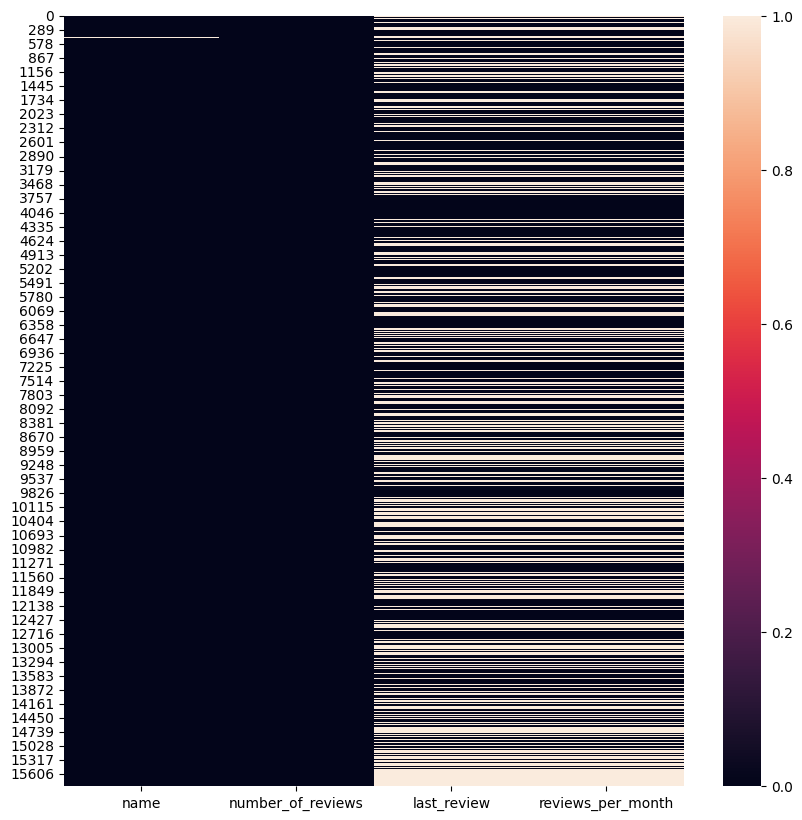

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','number_of_reviews','last_review','reviews_per_month']].isna())

Dari heatmap di atas, dapat kita lihat missing values pada:

* `name`
* `host_name`
* `last_review`
* `review_per_month`

Missing values pada kolom `last_review` dan `review_per_month` terhitung sebanyak 5790 atau 36.5% dari dataset ini. Tetapi, dua kolom tersebut bergantung pada nilai di kolom `number_of_reviews` di mana jika `number_of_reviews` adalah 0, maka `last_review` dan `reviews_per_month` secara logis harus bernilai `NaN` karena properti tersebut belum pernah menerima ulasan. Maka, langkah penanganan missing values yang dapat kita gunakan pada dua kolom tersebut adalah dengan mengisi nilai NaN secara logis berdasarkan kondisi di kolom number_of_reviews. Jika number_of_reviews bernilai 0, kita dapat mengisi kolom last_review dengan string seperti 'No Reviews' atau 'Tidak Ada Ulasan' dan mengisi kolom reviews_per_month dengan nilai 0. Hal ini memastikan bahwa data tetap konsisten dan merefleksikan kondisi sebenarnya di mana properti tersebut belum pernah mendapatkan ulasan.

Selain itu, kolom `name` dan `host_name` juga memiliki beberapa missing values, meskipun jumlahnya jauh lebih sedikit dibandingkan dengan kolom `last_review` dan `review_per_month`. Untuk kolom name, jika missing values ditemukan, kita akan melihat apakah properti tersebut memiliki host yang sama dengan listing lain. Jika host memiliki lebih dari satu listing, kita dapat menggunakan nama yang sama untuk properti tersebut. Langkah yang serupa akan diambil untuk kolom host_name, di mana kita akan memeriksa keterkaitan dengan listing lain yang dimiliki oleh host yang sama dan mengisi nilai NaN dengan nama host yang konsisten.

In [34]:
df.loc[df['number_of_reviews'] == 0, 'last_review'] = 'No Reviews'

In [35]:
df.loc[df['number_of_reviews'] == 0, 'reviews_per_month'] = 0

In [36]:
# missing values pada kolom "last_review' dan 'reviews_per_month' telah diganti.
df[['last_review','reviews_per_month']].isna().sum()

,0
last_review,0
reviews_per_month,0


In [37]:
#mencari missing values pada kolom 'name'
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,No Reviews,0.00,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,No Reviews,0.00,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,No Reviews,0.00,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,No Reviews,0.00,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,No Reviews,0.00,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,No Reviews,0.00,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [38]:
# menganalisa host yang memiliki nilai pada 'calculated_host_listings_count' > 1
df[df['host_id'] == 73275200]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,No Reviews,0.00,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Berdasarkan host_id `73275200`, listings yang dipasang memiliki nama yang sama dan memiliki lokasi geografis yang sangat berdekatan. Maka dari itu, kita akan mengisi missing value yang ada dengan menggunakan nama yang sama.

In [39]:
# Identifikasi host dengan lebih dari satu listing
multiple_listings = df['host_id'].value_counts()[df['host_id'].value_counts() > 1].index

# Loop untuk mengisi missing values berdasarkan host yang memiliki lebih dari satu listing
for host in multiple_listings:
    # Dapatkan nama untuk properti yang memiliki nama
    known_name = df.loc[(df['host_id'] == host) & df['name'].notnull(), 'name'].values
    if len(known_name) > 0:
        df.loc[(df['host_id'] == host) & df['name'].isna(), 'name'] = known_name[0]

df[df['host_id'] == 73275200]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,No Reviews,0.00,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [40]:
# missing value berkurang
df[['name']].isna().sum()

,0
name,7


Sekarang, missing value pada kolom `name` telah berkurang. Selanjutnya, kita akan mengubah value dari sisa missing values lainnya. Untuk membuat semuanya lebih mudah, kita akan mengganti value NaN yang tersisa pada kolom name dengan string default seperti 'Unnamed Listing'. Hal ini akan memastikan bahwa setiap listing memiliki nilai yang valid di kolom name, sehingga data lebih konsisten dan tidak ada nilai kosong yang tersisa.

In [41]:
# Identifikasi host dengan hanya satu listing
single_listing_hosts = df['host_id'].value_counts()[df['host_id'].value_counts() == 1].index

# Mengisi missing values dengan nama default untuk host dengan single listing
df.loc[(df['host_id'].isin(single_listing_hosts)) & df['name'].isna(), 'name'] = 'Unnamed Listing'


In [42]:
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,1
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


Sekarang hanya tersisa host_name yang memiliki missing values pada dataset ini. Secara logika, kolom host_name sangat penting karena mencerminkan identitas pemilik atau pengelola properti. Karena hanya tersisa sedikit missing values pada kolom ini, kita harus menangani missing values tersebut dengan cermat. Ada beberapa pendekatan yang bisa diambil:

1. Menggunakan Nama Default: Jika missing values ini tidak dapat diisi dengan informasi yang akurat, kita bisa menggantinya dengan nama default seperti 'Unknown Host' atau 'Unnamed Host'. Hal ini akan memastikan bahwa semua entri di dataset memiliki nama host yang valid, meskipun informasi aslinya tidak tersedia.

2. Menghubungkan dengan Data Lain: Jika ada informasi tambahan seperti host_id, kita bisa mencoba memverifikasi apakah host_name untuk host_id tersebut tercantum pada listing lain. Jika host_id yang sama memiliki nama host pada listing lain, kita dapat menggunakan nama tersebut untuk mengisi missing values.

3. Penghapusan Baris: Jika jumlah missing values sangat kecil dan nama host dianggap sangat penting untuk analisis, kita bisa mempertimbangkan untuk menghapus baris yang tidak memiliki host_name. Namun, ini biasanya dilakukan jika informasi lain di baris tersebut juga tidak lengkap atau jika analisis yang akan dilakukan memerlukan data yang lengkap.

Mari kita lihat listing yang berkaitan.

In [43]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Bisa kita lihat bahwa host dari listing ini tidak memiliki nama, tetapi ada satu review yang mengulas tentang listing ini. Jika kita analisa lebih dalam, kolom `number_of_reviews_ltm` berisi nilai 0, di mana kolom ini berisi tentang jumlah review dari 12 bulan terakhir. Secara logika, bisa kita simpulkan bahwa bisa saja host dari listing ini sudah tidak aktif. Maka, temuan ini mengarahkan kita untuk cenderung melakukan penghapusan baris karena kualitas data yang kurang signifikan (Host Name = 0, Host Listing Count = 1, Number of Reviews in the Last Twelve Months = 0)

In [44]:
df = df.drop(index=3571)
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


Sekarang, seluruh kolom tidak memiliki missing values. Mari kita lakukan verifikasi data untuk memeriksa kembali data yang tidak masuk akal.

## Verifikasi Data

Kita cek kembali deskripsi data yang telah dirapikan

In [45]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585300e+04,1.585300e+04,15853.000000,15853.000000,1.585300e+04,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000
mean,1.579496e+17,1.541068e+08,13.745142,100.559898,3.217819e+03,15.293131,16.655144,0.516210,13.890431,244.371034,3.481738
std,2.946082e+17,1.318767e+08,0.043040,0.050908,2.497291e+04,50.816529,40.614422,0.952775,30.270630,125.843547,8.917176
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.504244e+07,1.224556e+08,13.738490,100.561410,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256284e+07,2.390638e+08,13.759490,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Terdapat data yang perlu diverifikasi pada kolom `price` dan `minimum_nights`. Pada kolom `price`, nilai minimumnya adalah 0 atau gratis dan pada kolom `minimum_nights`, nilai maksimumnya adalah 1,125 hari atau lebih dari 3 tahun. Data ini tidak konsisten sehingga perlu diverifikasi.

In [46]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,No Reviews,0.0,1,0,0


Terlihat bahwa listing ini tidak memiliki review, berupa kamar hotel, dan memiliki harga sewa sebesar 0, yang tidak masuk akal untuk sebuah properti di Airbnb. Selain itu, listing ini juga memiliki minimum_nights yang sangat rendah, yaitu 1 malam, dan availability_365 menunjukkan bahwa properti ini tidak tersedia sama sekali (0 hari dalam setahun). Kombinasi dari faktor-faktor ini menunjukkan bahwa data ini mungkin bermasalah atau tidak valid.

In [47]:
# Menghapus entry
df = df.drop(index=11103)

Selanjutnya, kita akan melakukan verifikasi terhadap kolom `minimum_nights` untuk melihat listing yang memiliki minimum nights berdasarkan nilai yang paling besar.

In [48]:
df.sort_values(by='minimum_nights', ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,No Reviews,0.00,2,358,0
11524,49032568,Freehold Condo near Bangsue Grand Station,4661237,Chayanid,Bang Sue,13.80697,100.52362,Entire home/apt,554,1095,0,No Reviews,0.00,1,358,0
10153,41623113,blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasakBTS,162537040,Songnya,Sathon,13.71195,100.52055,Entire home/apt,650,1000,2,2020-03-08,0.06,13,179,0
11243,45051929,Bellevue Boutique Bangkok | Airport Link HUA-MAK,165329146,Sataporn,Suanluang,13.73633,100.63836,Private room,1314,999,0,No Reviews,0.00,2,181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,20339602,The Supara - 1BR Twin beds,8807437,Oillie,Bangkok Yai,13.74254,100.47208,Entire home/apt,1100,1,0,No Reviews,0.00,11,353,0
3874,20336576,曼谷地铁汇狂站5分钟 曼谷最大火车夜市 代购按摩街 暹罗天使剧场 建兴酒家 华人中文必住民宿6,105689479,Taosiam,Huai Khwang,13.77911,100.57544,Entire home/apt,700,1,120,2020-04-13,1.89,34,102,0
9335,39847641,Stylish Condo! Steps to trendy Thong Lor| King Bed,294461505,FinLoft,Vadhana,13.73891,100.58935,Entire home/apt,1761,1,9,2022-11-18,0.45,1,313,6
3873,20336542,曼谷新唐人街地铁汇狂站出口5分钟 最大火车夜市 代购按摩街 大型BC超市 建兴酒家 华人中文服务民宿,105689479,Taosiam,Huai Khwang,13.77903,100.57960,Entire home/apt,720,1,54,2020-03-01,0.83,34,102,0


Jika kita lihat, terdapat review yang cukup banyak untuk listing yang memiliki minimum nights terbanyak yaitu 1,125 hari. Melihat kondisi di lapangan, tidak sedikit orang yang menyewa properti secara tahunan melalui airbnb. Maka dari itu, listing dengan minimum_nights sebesar 1,125 hari (sekitar 3 tahun) mungkin bukan merupakan anomali, melainkan mencerminkan properti yang memang ditujukan untuk penyewaan jangka panjang. Selain itu, fakta bahwa listing ini memiliki cukup banyak ulasan menunjukkan bahwa properti ini memang diminati dan disewa oleh pengguna Airbnb, meskipun untuk jangka waktu yang sangat lama.

In [49]:
display(df.describe(), df.describe(include = object),df.isna().sum())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585200e+04,1.585200e+04,15852.000000,15852.000000,1.585200e+04,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000,15852.000000
mean,1.579596e+17,1.540938e+08,13.745143,100.559898,3.218022e+03,15.294032,16.656195,0.516242,13.891244,244.386450,3.481958
std,2.946148e+17,1.318707e+08,0.043042,0.050910,2.497368e+04,50.818005,40.615488,0.952796,30.271412,125.832546,8.917414
min,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720087,100.529685,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224094e+08,13.738490,100.561405,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256602e+07,2.390365e+08,13.759493,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15852,15852,15852,15852,15852
unique,14793,5311,50,4,1670
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,No Reviews
freq,45,228,2152,8912,5789


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


Sekarang, data sudah bersih dan langkah selanjutnya adalah mengecek outlier pada kolom-kolom yang relevan, seperti:

* `neighbourhood`
* `host_id`
* `price`
* `room_type`
* `minimum_nights`
* `number_of_reviews`
* `availability_365`

In [50]:
df = df.drop(columns=['id', 'host_name', 'last_review', 'reviews_per_month', 'latitude', 'longitude','calculated_host_listings_count','number_of_reviews_ltm'])
df

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Nice room with superb city view,120437,Ratchathewi,Entire home/apt,1905,3,65,353
1,"Easy going landlord,easy place",120541,Bang Na,Private room,1316,1,0,358
2,modern-style apartment in Bangkok,123784,Bang Kapi,Private room,800,60,0,365
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Din Daeng,Private room,1286,7,2,323
4,Suite Room 3 at MetroPoint,610315,Bang Kapi,Private room,1905,1,0,365
...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Pra Wet,Private room,2298,28,0,362
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1429,1,0,365
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Ratchathewi,Private room,1214,1,0,365
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Ratchathewi,Private room,1214,1,0,365


In [51]:
display(df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15852 entries, 0 to 15853
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               15852 non-null  object
 1   host_id            15852 non-null  int64 
 2   neighbourhood      15852 non-null  object
 3   room_type          15852 non-null  object
 4   price              15852 non-null  int64 
 5   minimum_nights     15852 non-null  int64 
 6   number_of_reviews  15852 non-null  int64 
 7   availability_365   15852 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.1+ MB


,host_id,price,minimum_nights,number_of_reviews,availability_365
count,1.585200e+04,1.585200e+04,15852.000000,15852.000000,15852.000000
mean,1.540938e+08,3.218022e+03,15.294032,16.656195,244.386450
std,1.318707e+08,2.497368e+04,50.818005,40.615488,125.832546
min,5.892000e+04,2.780000e+02,1.000000,0.000000,0.000000
25%,3.974431e+07,9.000000e+02,1.000000,0.000000,138.000000
50%,1.224094e+08,1.429000e+03,1.000000,2.000000,309.000000
75%,2.390365e+08,2.429000e+03,7.000000,13.000000,360.000000
max,4.926659e+08,1.100000e+06,1125.000000,1224.000000,365.000000


None

Berdasarkan analisis statistik deskriptif pada variabel price, minimum_nights, number_of_reviews, dan availability_365, dapat dilihat bahwa terdapat outliers yang signifikan dan distribusi data yang tidak normal.

* Price: Nilai maksimum dari price mencapai 1.1 juta, sedangkan kuartil ketiga hanya berada di kisaran 2.429 ribu. Rata-rata price berada di kisaran 3.218 ribu, dengan standar deviasi yang sangat besar, yaitu 24.973 ribu. Ini menunjukkan adanya beberapa listing dengan harga yang sangat tinggi dibandingkan mayoritas data lainnya.
* Minimum Nights: Jumlah malam minimum bervariasi dari 1 hingga 1125 malam, dengan median di 1 malam dan kuartil ketiga di 7 malam. Hal ini menunjukkan bahwa sebagian besar listing memiliki persyaratan menginap minimum yang pendek, namun ada beberapa outliers yang memiliki persyaratan menginap sangat panjang.
* Number of Reviews: Sebagian besar properti memiliki sedikit atau tidak ada ulasan sama sekali, dengan kuartil pertama dan median berada di angka 0 dan 2 ulasan. Namun, terdapat outliers dengan jumlah ulasan hingga 1224, jauh di atas rata-rata 16,65 ulasan.
* Availability 365: Sebagian besar properti tersedia hampir sepanjang tahun, dengan kuartil ketiga berada di 360 hari dan maksimum 365 hari. Namun, ada juga properti yang tidak tersedia sama sekali, seperti terlihat dari nilai minimum 0.

Secara keseluruhan, setiap variabel yang dianalisis menunjukkan adanya outliers yang cukup besar dan distribusi data yang tidak normal serta cenderung miring ke kanan (right-skewed). Outliers ini perlu diperhatikan lebih lanjut dalam analisis agar tidak mendistorsi hasil dan interpretasi data

## Membersihkan Duplikat

In [52]:
#mengumpulkan duplikat secara general
duplicates = df.duplicated()

df_duplicates = df [duplicates]

df_duplicates

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
950,Shanti Lodge: Art House AC Dorm,34795931,Dusit,Shared room,600,1,0,363
983,Shanti Lodge: Family Sleeps 4 in Old Town Bangkok,34795931,Dusit,Private room,1883,1,0,357
1373,The Tree Interchange (river view),52278760,Bang Sue,Private room,1385,365,0,365
2325,Stylish room near Khaosarn Road + Free Breakfast,8444643,Phra Nakhon,Private room,1699,1,0,365
3292,Super Stylish Room +Free Breakkfast @BTS Phayathai,8444643,Ratchathewi,Private room,3500,1,0,365
...,...,...,...,...,...,...,...,...
15844,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1529,1,0,365
15846,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1443,1,0,365
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Ratchathewi,Private room,1214,1,0,365
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Ratchathewi,Private room,1214,1,0,365


In [53]:
#menghapus duplikat
df_cleardupe = df.drop_duplicates()

df_cleardupe

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Nice room with superb city view,120437,Ratchathewi,Entire home/apt,1905,3,65,353
1,"Easy going landlord,easy place",120541,Bang Na,Private room,1316,1,0,358
2,modern-style apartment in Bangkok,123784,Bang Kapi,Private room,800,60,0,365
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Din Daeng,Private room,1286,7,2,323
4,Suite Room 3 at MetroPoint,610315,Bang Kapi,Private room,1905,1,0,365
...,...,...,...,...,...,...,...,...
15845,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1443,1,0,365
15847,Family Room for 8 People,340188343,Vadhana,Private room,2700,1,0,365
15848,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1400,1,0,357
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Pra Wet,Private room,2298,28,0,362


In [54]:
#menghapus duplikat berdasarkan kolom spesifik untuk menghapus listing yang sama
duplicates_specific = df_cleardupe[df_cleardupe.duplicated(subset=['name','host_id','neighbourhood','room_type','price'])]

duplicates_specific

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
294,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Vadhana,Entire home/apt,9999,2,25,358
317,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Vadhana,Entire home/apt,9999,2,24,359
551,Luxury 3 Bedrooms Suite @BTS Phrompong,8444643,Vadhana,Entire home/apt,9999,2,19,360
944,Shanti Lodge: Art House AC Dorm,34795931,Dusit,Shared room,600,1,1,364
945,Shanti Lodge: Art House AC Dorm,34795931,Dusit,Shared room,600,1,0,336
...,...,...,...,...,...,...,...,...
15682,"Feel at Home in Bangkok, BTS S4 SaintLouis Station",437245875,Sathon,Private room,1496,2,0,365
15751,"Very New, 3min BTS Phahonyothin 24, 32sqm 4FL",458715536,Chatu Chak,Entire home/apt,720,29,0,333
15806,"50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym",472715937,Bang Sue,Entire home/apt,560,12,0,363
15820,"50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym",472715937,Bang Sue,Entire home/apt,560,12,0,302


In [55]:
dfcleaned = df_cleardupe.drop_duplicates(subset=['name','host_id','neighbourhood','room_type','price'])

# memastikan duplikat sudah dihapus
display(dfcleaned.info(), dfcleaned)

<class 'pandas.core.frame.DataFrame'>
Index: 15350 entries, 0 to 15850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               15350 non-null  object
 1   host_id            15350 non-null  int64 
 2   neighbourhood      15350 non-null  object
 3   room_type          15350 non-null  object
 4   price              15350 non-null  int64 
 5   minimum_nights     15350 non-null  int64 
 6   number_of_reviews  15350 non-null  int64 
 7   availability_365   15350 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.1+ MB


None

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Nice room with superb city view,120437,Ratchathewi,Entire home/apt,1905,3,65,353
1,"Easy going landlord,easy place",120541,Bang Na,Private room,1316,1,0,358
2,modern-style apartment in Bangkok,123784,Bang Kapi,Private room,800,60,0,365
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Din Daeng,Private room,1286,7,2,323
4,Suite Room 3 at MetroPoint,610315,Bang Kapi,Private room,1905,1,0,365
...,...,...,...,...,...,...,...,...
15845,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1443,1,0,365
15847,Family Room for 8 People,340188343,Vadhana,Private room,2700,1,0,365
15848,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1400,1,0,357
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Pra Wet,Private room,2298,28,0,362


In [56]:
##menghapus duplikat berdasarkan kolom spesifik untuk menghapus listing properti yang sama dengan harga yang berbeda untuk menghindari listing double
duplicates_specific1 = dfcleaned[dfcleaned.duplicated(subset=['name','host_id','neighbourhood','room_type'])]

duplicates_specific1

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
481,Spacious two Bedroom Apartment,5469970,Suanluang,Entire home/apt,1662,10,29,365
877,Double bed room near On-Nut BTS,30518876,Phra Khanong,Entire home/apt,1080,1,3,365
986,Shanti Lodge. Art House. Traditional Room,34795931,Dusit,Private room,589,1,0,359
1527,Peaberry Place Apartment,49176210,Chatu Chak,Private room,710,2,78,84
1533,Peaberry Place Apartment,49176210,Chatu Chak,Private room,696,2,27,85
...,...,...,...,...,...,...,...,...
15829,Family Room for 4 People,340188343,Vadhana,Private room,2237,1,0,360
15834,SuperHost Studio Sukhumvit BTS Nana 5min 200M Wifi,6379413,Khlong Toei,Entire home/apt,2271,1,0,344
15845,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1443,1,0,365
15848,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Ratchathewi,Private room,1400,1,0,357


In [57]:
dfcleaned1 = dfcleaned.drop_duplicates(subset=['name','host_id','neighbourhood','room_type'])

#memastikan duplikat sudah dihapus
display(dfcleaned1, dfcleaned1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15001 entries, 0 to 15849
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               15001 non-null  object
 1   host_id            15001 non-null  int64 
 2   neighbourhood      15001 non-null  object
 3   room_type          15001 non-null  object
 4   price              15001 non-null  int64 
 5   minimum_nights     15001 non-null  int64 
 6   number_of_reviews  15001 non-null  int64 
 7   availability_365   15001 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.0+ MB


,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Nice room with superb city view,120437,Ratchathewi,Entire home/apt,1905,3,65,353
1,"Easy going landlord,easy place",120541,Bang Na,Private room,1316,1,0,358
2,modern-style apartment in Bangkok,123784,Bang Kapi,Private room,800,60,0,365
3,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Din Daeng,Private room,1286,7,2,323
4,Suite Room 3 at MetroPoint,610315,Bang Kapi,Private room,1905,1,0,365
...,...,...,...,...,...,...,...,...
15839,Ratchada Condo next To MRT,34432625,Huai Khwang,Entire home/apt,2100,28,0,332
15840,Sukhumvit Condo Next to BTS,34432625,Bang Na,Entire home/apt,1400,28,0,364
15842,1 Bed for 1 person Close to Chatuchak market BTS,153568635,Chatu Chak,Private room,499,5,0,365
15847,Family Room for 8 People,340188343,Vadhana,Private room,2700,1,0,365


None

In [58]:
#mengidentifikasi dan mengumpulkan duplikat untuk memastikan duplikat sudah dihapus berdasarkan kolom spesifik
duplicates_by_name = dfcleaned1[dfcleaned1.duplicated(subset=['name','host_id','neighbourhood','room_type'], keep=False)]

duplicates_by_name

,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365


In [59]:
df = dfcleaned1

display(df.info(),df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 15001 entries, 0 to 15849
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               15001 non-null  object
 1   host_id            15001 non-null  int64 
 2   neighbourhood      15001 non-null  object
 3   room_type          15001 non-null  object
 4   price              15001 non-null  int64 
 5   minimum_nights     15001 non-null  int64 
 6   number_of_reviews  15001 non-null  int64 
 7   availability_365   15001 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.0+ MB


None

,host_id,price,minimum_nights,number_of_reviews,availability_365
count,1.500100e+04,1.500100e+04,15001.000000,15001.000000,15001.000000
mean,1.525522e+08,3.272967e+03,15.878675,17.088194,243.934671
std,1.323739e+08,2.565287e+04,51.976867,41.526719,125.513347
min,5.892000e+04,2.780000e+02,1.000000,0.000000,0.000000
25%,3.758032e+07,9.000000e+02,1.000000,0.000000,136.000000
50%,1.187436e+08,1.408000e+03,1.000000,2.000000,307.000000
75%,2.397361e+08,2.449000e+03,7.000000,14.000000,360.000000
max,4.926659e+08,1.100000e+06,1125.000000,1224.000000,365.000000


Berdasarkan analisis statistik deskriptif setelah pengurangan entri akibat penghapusan data duplikat, terlihat bahwa meskipun jumlah entri sedikit berkurang, pola distribusi data tetap konsisten dengan data awal. Penghapusan duplikat membantu memperjelas gambaran sebenarnya dari data, namun tidak mengubah karakteristik distribusi secara signifikan.

* Price: Setelah penghapusan duplikat, nilai maksimum dari price masih mencapai 1.1 juta, dengan kuartil ketiga berada di kisaran 2.449 ribu. Rata-rata price sedikit meningkat menjadi 3.273 ribu, dan standar deviasi tetap besar di 25.653 ribu. Hal ini menunjukkan bahwa meskipun jumlah entri berkurang, outliers dalam data masih tetap ada dan mempengaruhi distribusi harga.
* Minimum Nights: Penghapusan duplikat tidak banyak mengubah distribusi minimum_nights, yang masih bervariasi dari 1 hingga 1125 malam, dengan median tetap di 1 malam dan kuartil ketiga di 7 malam. Ini menegaskan bahwa sebagian besar listing memiliki persyaratan menginap minimum yang pendek, namun beberapa listing dengan persyaratan menginap yang sangat panjang tetap ada.
* Number of Reviews: Jumlah ulasan pada sebagian besar properti tetap rendah, dengan kuartil pertama dan median masih berada di angka 0 dan 2 ulasan. Rata-rata jumlah ulasan meningkat sedikit menjadi 17,09 ulasan setelah penghapusan duplikat. Namun, outliers dengan jumlah ulasan hingga 1224 tetap ada, menunjukkan bahwa properti dengan ulasan sangat tinggi tetap mendominasi meskipun duplikat telah dihapus.
* Availability 365: Distribusi availability_365 juga tetap stabil setelah penghapusan duplikat. Sebagian besar properti masih tersedia hampir sepanjang tahun, dengan kuartil ketiga berada di 360 hari dan maksimum 365 hari, serta minimum tetap di 0 hari.

Secara keseluruhan, penghapusan data duplikat telah mengurangi jumlah entri, namun tidak banyak mempengaruhi pola distribusi utama dari variabel-variabel yang dianalisis. Outliers dan distribusi yang tidak normal tetap dominan, menunjukkan bahwa data ini masih memiliki variasi yang signifikan yang perlu diperhatikan dalam analisis lebih lanjut. Pengurangan entri melalui penghapusan duplikat membantu membersihkan data, tetapi tetap mempertahankan karakteristik utama dari distribusi data.

## Mengatasi Outlier

In [60]:
display(df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15001 entries, 0 to 15849
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               15001 non-null  object
 1   host_id            15001 non-null  int64 
 2   neighbourhood      15001 non-null  object
 3   room_type          15001 non-null  object
 4   price              15001 non-null  int64 
 5   minimum_nights     15001 non-null  int64 
 6   number_of_reviews  15001 non-null  int64 
 7   availability_365   15001 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.0+ MB


,host_id,price,minimum_nights,number_of_reviews,availability_365
count,1.500100e+04,1.500100e+04,15001.000000,15001.000000,15001.000000
mean,1.525522e+08,3.272967e+03,15.878675,17.088194,243.934671
std,1.323739e+08,2.565287e+04,51.976867,41.526719,125.513347
min,5.892000e+04,2.780000e+02,1.000000,0.000000,0.000000
25%,3.758032e+07,9.000000e+02,1.000000,0.000000,136.000000
50%,1.187436e+08,1.408000e+03,1.000000,2.000000,307.000000
75%,2.397361e+08,2.449000e+03,7.000000,14.000000,360.000000
max,4.926659e+08,1.100000e+06,1125.000000,1224.000000,365.000000


None

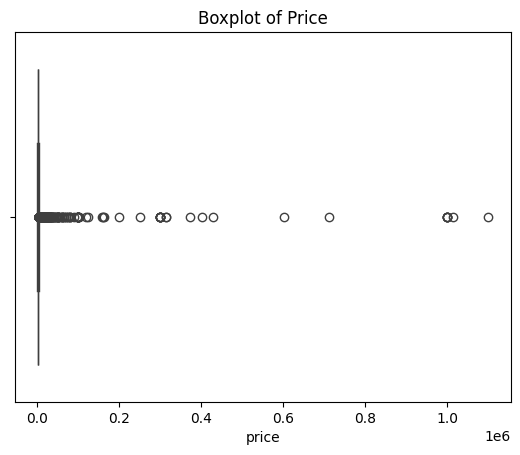

In [61]:
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

In [62]:
#membuat fungsi untuk menghitung outliers
def hitung_outliers(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    # Menemukan outliers berdasarkan IQR
    outliers = df[(df[kolom] < (Q1 - 1.5 * IQR)) | (df[kolom] > (Q3 + 1.5 * IQR))]
    jumlah_outliers = outliers.shape[0]

    # Menghitung persentase outliers
    total_data = df.shape[0]
    persentase_outliers = (jumlah_outliers / total_data) * 100

    return jumlah_outliers, persentase_outliers

jumlah_outliers, persentase_outliers = hitung_outliers(df, 'price')

print(f"Jumlah outliers di kolom 'price': {jumlah_outliers}")
print(f"Persentase outliers dari total data: {persentase_outliers:.2f}%")

Jumlah outliers di kolom 'price': 1336
Persentase outliers dari total data: 8.91%


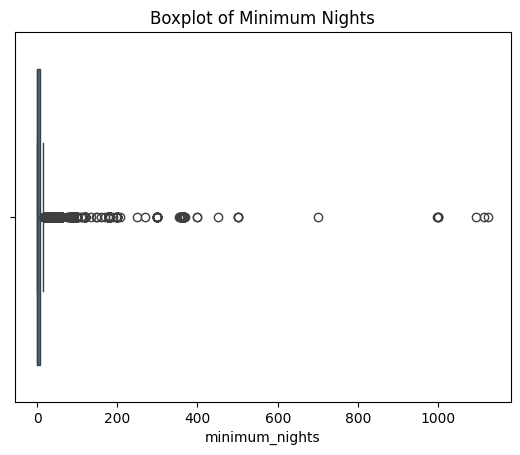

In [63]:
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.show()

In [64]:
jumlah_outliers, persentase_outliers = hitung_outliers(df, 'minimum_nights')

print(f"Jumlah outliers di kolom 'minimum_nights': {jumlah_outliers}")
print(f"Persentase outliers dari total data: {persentase_outliers:.2f}%")

Jumlah outliers di kolom 'minimum_nights': 3091
Persentase outliers dari total data: 20.61%


Karena jumlah outlier terbilang banyak (mencakup 8.91% dari dataset), maka kita harus menentukan harga maksimum yang relevan. Mean pada kolom `price` adalah 3,272.967 THB dengan standar deviasi sebesar 25,653 THB. Secara logika, demand untuk penginapan dengan harga yang lebih terjangkau akan lebih tinggi dibandingkan harga yang lebih mahal. Selain itu, harga yang cenderung mahal biasanya memiliki segmentasi pasar yang lebih eksklusif, seperti sewa jangka panjang, turis menengah ke atas, dan sebagainya, yang dapat memberikan hasil yang kurang akurat untuk analisis pasar secara umum. Oleh karena itu, kita akan menentukan nilai maksimum dari kolom `price` untuk memperoleh data yang lebih akurat.

Selain itu, jumlah outliers di kolom `minimum_nights` mencapai 3,091 entri, atau sekitar 20.61% dari total data. Untuk mengurangi outliers yang signifikan, kita akan menetapkan batas maksimum untuk `minimum_nights` kurang dari 31 malam (satu bulan). Dengan demikian, kita dapat mencakup pasar yang lebih luas, termasuk sewa harian, mingguan, dan bulanan, yang lebih relevan dan representatif dalam analisis pasar akomodasi di Bangkok.

Per tanggal 24 Agustus 2024, nilai tukar THB/IDR adalah 1/452.84. Kita akan mengambil nilai 5,000 THB atau setara dengan Rp. 2,264,200. Parameter ini akan membantu mengukur pengaruh harga terhadap pilihan customer dengan mengurangi jumlah outlier yang signifikan dan membuat data yang digunakan menjadi lebih umum dan representatif untuk pasar yang lebih luas.

In [65]:
df_filtered = df[(df['price'] <= 5000) & (df['minimum_nights'] <= 31) & (df['availability_365'] <= 182)]

display(df_filtered.describe(), df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 9 to 15835
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               5301 non-null   object
 1   host_id            5301 non-null   int64 
 2   neighbourhood      5301 non-null   object
 3   room_type          5301 non-null   object
 4   price              5301 non-null   int64 
 5   minimum_nights     5301 non-null   int64 
 6   number_of_reviews  5301 non-null   int64 
 7   availability_365   5301 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 372.7+ KB


,host_id,price,minimum_nights,number_of_reviews,availability_365
count,5.301000e+03,5301.000000,5301.000000,5301.000000,5301.000000
mean,1.489924e+08,1673.548953,7.141294,19.965101,101.736276
std,1.159858e+08,1034.741620,10.302932,41.730557,60.811294
min,5.892000e+04,295.000000,1.000000,0.000000,0.000000
25%,4.674985e+07,900.000000,1.000000,0.000000,59.000000
50%,1.246903e+08,1390.000000,2.000000,3.000000,90.000000
75%,2.329775e+08,2199.000000,7.000000,20.000000,163.000000
max,4.926659e+08,5000.000000,31.000000,486.000000,182.000000


None

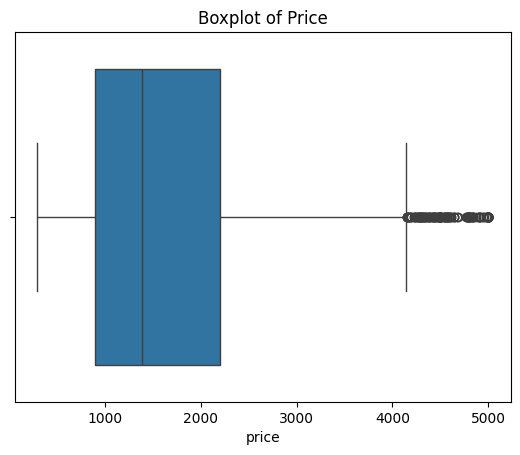

In [66]:
sns.boxplot(x=df_filtered['price'])
plt.title('Boxplot of Price')
plt.show()

In [67]:
jumlah_outliers, persentase_outliers = hitung_outliers(df_filtered, 'price')
print(f"Jumlah outliers di kolom 'price': {jumlah_outliers}")
print(f"Persentase outliers dari total data: {persentase_outliers:.2f}%")

Jumlah outliers di kolom 'price': 175
Persentase outliers dari total data: 3.30%


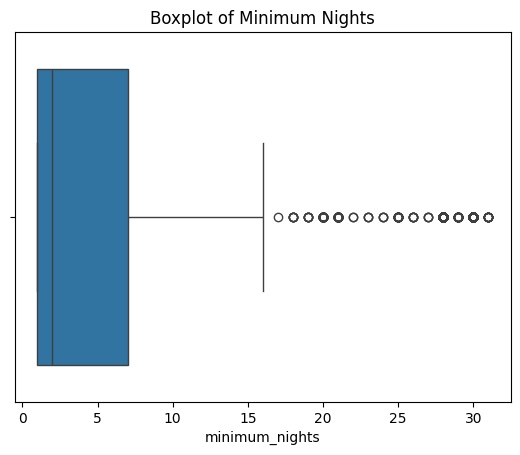

In [68]:
sns.boxplot(x=df_filtered['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.show()

In [69]:
jumlah_outliers, persentase_outliers = hitung_outliers(df_filtered, 'minimum_nights')
print(f"Jumlah outliers di kolom 'minimum_nights': {jumlah_outliers}")
print(f"Persentase outliers dari total data: {persentase_outliers:.2f}%")

Jumlah outliers di kolom 'minimum_nights': 960
Persentase outliers dari total data: 18.11%


In [70]:
#memfilter data untuk availabilitynya di bawah 6 bulan
df_filtered[df_filtered['availability_365'] <= 182]
df = df_filtered

display(df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 9 to 15835
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               5301 non-null   object
 1   host_id            5301 non-null   int64 
 2   neighbourhood      5301 non-null   object
 3   room_type          5301 non-null   object
 4   price              5301 non-null   int64 
 5   minimum_nights     5301 non-null   int64 
 6   number_of_reviews  5301 non-null   int64 
 7   availability_365   5301 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 372.7+ KB


,host_id,price,minimum_nights,number_of_reviews,availability_365
count,5.301000e+03,5301.000000,5301.000000,5301.000000,5301.000000
mean,1.489924e+08,1673.548953,7.141294,19.965101,101.736276
std,1.159858e+08,1034.741620,10.302932,41.730557,60.811294
min,5.892000e+04,295.000000,1.000000,0.000000,0.000000
25%,4.674985e+07,900.000000,1.000000,0.000000,59.000000
50%,1.246903e+08,1390.000000,2.000000,3.000000,90.000000
75%,2.329775e+08,2199.000000,7.000000,20.000000,163.000000
max,4.926659e+08,5000.000000,31.000000,486.000000,182.000000


None

In [71]:
#menghapus kolom minimum_nights untuk data analysis
df = df.drop(columns=['minimum_nights','number_of_reviews'])

In [72]:
listItem = []
for col in df.columns:
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        list(df[col].drop_duplicates().sample(2, random_state=42).values)
    ])
dfClean = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)
print(df.shape)

dfClean

(5301, 6)


,dataFeatures,dataType,null,unique,uniqueSample
0,name,object,0,5248,"[ลุมพินีคอนโดทาวน์ บางแค, 7 mins walk to Talad Roi Fai - Superior Double]"
1,host_id,int64,0,2809,"[239225756, 341190723]"
2,neighbourhood,object,0,49,"[Bang Kapi, Bang Khae]"
3,room_type,object,0,4,"[Entire home/apt, Hotel room]"
4,price,int64,0,1450,"[1821, 1415]"
5,availability_365,int64,0,183,"[130, 12]"


Setelah melalui proses pembersihan, dataset yang kita miliki sekarang terdiri dari 13,069 entri dengan mean dan standar deviasi yang lebih realistis, khususnya pada variabel price dan minimum_nights. Misalnya, mean untuk price saat ini berada di kisaran 1,630 THB dengan standar deviasi sekitar 1,027, sementara mean untuk minimum_nights berada di 6,7 malam dengan standar deviasi 10,1 malam. Distribusi data yang lebih terpusat ini menunjukkan bahwa, meskipun sebagian besar outliers telah dihapus, beberapa outliers tetap ada, khususnya dalam hal harga dan jumlah malam minimum.

* Outliers: Meskipun telah terjadi pengurangan signifikan dalam jumlah outliers, outliers yang tersisa tetap terlihat, terutama dalam hal price dan minimum_nights. Outliers ini masih memiliki potensi untuk mempengaruhi hasil analisis jika tidak ditangani dengan tepat.

* Distribusi Data: Distribusi data yang tidak normal dan skewed ke kanan (right-skewed) menunjukkan bahwa sebagian besar properti memiliki harga dan persyaratan minimum yang lebih rendah daripada beberapa outliers ekstrem.

* Relevansi Data: Meskipun adanya outliers, data yang telah dibersihkan ini tetap memberikan gambaran penting tentang variasi dalam properti Airbnb di Bangkok, dari properti dengan harga terjangkau hingga properti dengan harga yang lebih tinggi dan jumlah malam minimum yang lebih panjang.

Dengan pemahaman ini, kita dapat melanjutkan ke tahap analisis data, di mana penting untuk mempertimbangkan dampak dari outliers yang tersisa dan distribusi data yang tidak normal ini pada hasil analisis.

# Data Analysis

Setelah menyelesaikan tahap pembersihan data, kita akan fokus pada analisis tiga variabel utama: `neighbourhood`, `price`, dan `room_type`, untuk memahami bagaimana lokasi populer, harga, dan fasilitas mempengaruhi pilihan akomodasi di Airbnb Bangkok, dengan mempertimbangkan ketersediaan (`availability_365`).

Analisis ini akan dilakukan dengan membandingkan data berdasarkan variabel `neighbourhood`, `price`, dan `room_type`. Dengan pendekatan ini, kita dapat lebih baik memahami bagaimana ketiga variabel ini berinteraksi dan mempengaruhi preferensi pelanggan. Selama analisis, kita akan memeriksa distribusi, proporsi, dan hubungan antara variabel-variabel tersebut untuk mendapatkan wawasan yang lebih mendalam dan akurat.

## `neighbourhood`

Berdasarkan lokasi properti (neighbourhood) di Bangkok, kita akan menganalisis bagaimana pengaruh lokasi terhadap pilihan akomodasi oleh pelanggan. Dengan analisis ini, kita berharap dapat mengidentifikasi kawasan-kawasan di Bangkok yang paling diminati oleh pelanggan serta memahami bagaimana lokasi mempengaruhi keputusan mereka dalam memilih akomodasi.

In [73]:
df_neighbourhood = df['neighbourhood'].value_counts().reset_index()
df_neighbourhood.columns = ['neighbourhood', 'Total']

# Memfilter neighbourhood yang totalnya lebih dari 100
df_neighbourhood_filtered = df_neighbourhood[df_neighbourhood['Total'] > 100]
df_neighbourhood_sorted = df_neighbourhood_filtered.sort_values('Total', ascending=True)

#dataframe filtered berdasarkan neighbourhood
df_filtered = df[df['neighbourhood'].isin(df_neighbourhood_sorted['neighbourhood'])]


print(df_neighbourhood_sorted)

   neighbourhood  Total
15      Bang Sue    103
14     Suanluang    116
13    Khlong San    119
12   Phra Nakhon    134
11   Parthum Wan    135
10       Bang Na    150
9      Din Daeng    162
8     Phaya Thai    166
7     Chatu Chak    184
6         Sathon    204
5   Phra Khanong    220
4       Bang Rak    231
3    Ratchathewi    335
2    Huai Khwang    448
1    Khlong Toei    746
0        Vadhana    806


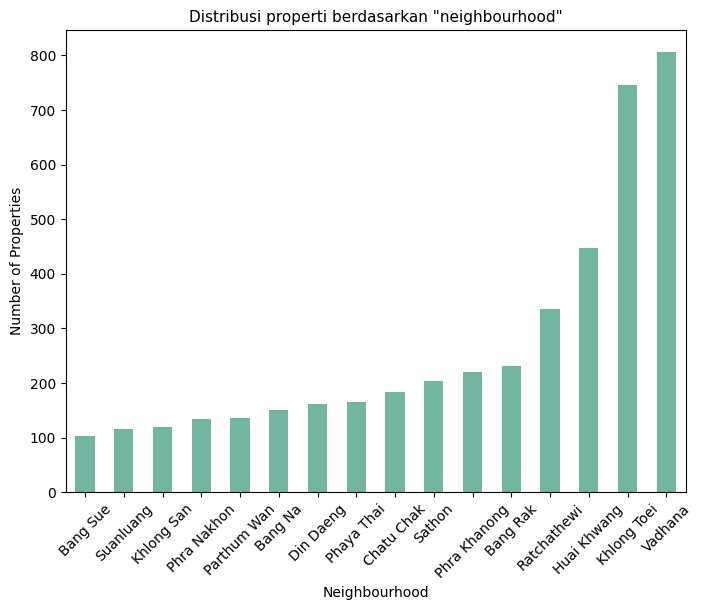

In [74]:
sns.set_palette('Set2')

plt.figure(figsize=(8, 6))
sns.countplot(
    x=df[df['neighbourhood'].isin(df_neighbourhood_sorted['neighbourhood'])]['neighbourhood'],
    order=df_neighbourhood_sorted['neighbourhood'],
    width=0.5
)

plt.title('Distribusi properti berdasarkan "neighbourhood"', size=11)
plt.ylabel('Number of Properties')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45)
plt.show()

Berdasarkan analisis data, neighbourhood dengan jumlah properti terbanyak adalah Vadhana dan Khlong Toei. Kawasan ini memiliki lebih dari 700 properti yang terdaftar di Airbnb. Hal ini menunjukkan bahwa kawasan ini merupakan salah satu area utama yang banyak dipilih oleh pemilik properti untuk menyewakan akomodasi mereka.

Selanjutnya, kita akan melihat average availability dari `availability_365` berdasarkan tiap `neighbourhood`.

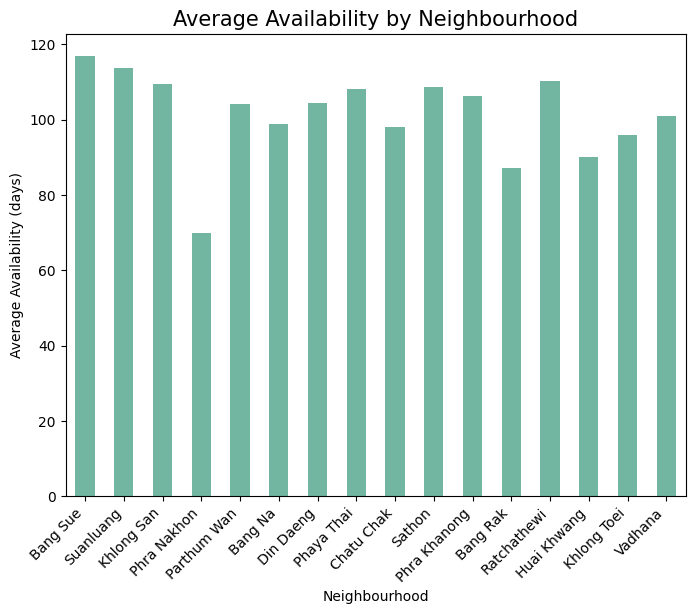

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_filtered, y='availability_365', x='neighbourhood', ci=None, order=df_neighbourhood_sorted['neighbourhood'], width=0.5)
plt.title('Average Availability by Neighbourhood', size=15)
plt.ylabel('Average Availability (days)')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.show()

In [120]:
import scipy.stats as stats
from scipy.stats import kruskal

# Uji Kruskal-Wallis (karena kemungkinan data tidak normal)
neighbourhood_groups = [df[df['neighbourhood'] == neighbourhood]['availability_365'] for neighbourhood in df['neighbourhood'].unique()]
stat, pval = kruskal(*neighbourhood_groups)

if pval <= 0.05:
    print('Tolak H0 - Ada perbedaan signifikan dalam availability_365 antara neighbourhood')
else:
    print('Gagal menolak H0 - Tidak ada perbedaan signifikan dalam availability_365 antara neighbourhood')
print(f'p-value: {pval}')

Tolak H0 - Ada perbedaan signifikan dalam availability_365 antara neighbourhood
p-value: 1.2984740644763194e-19


Hasil analisis menunjukkan bahwa terdapat perbedaan signifikan dalam ketersediaan hari `availability_365` antara berbagai `neighbourhood` di Bangkok. Ini berarti bahwa properti di beberapa `neighbourhood` cenderung lebih sering tersedia atau, sebaliknya, lebih cepat dipesan dibandingkan dengan properti di `neighbourhood` lainnya.

`neighbourhood` yang memiliki tingkat ketersediaan yang lebih rendah mungkin mencerminkan popularitas yang tinggi di kalangan wisatawan, sehingga properti di daerah tersebut lebih sering dipesan dan memiliki ketersediaan yang terbatas. Sebaliknya, neighbourhood dengan ketersediaan yang lebih tinggi mungkin menunjukkan bahwa properti di daerah tersebut kurang diminati atau bahwa ada banyak pilihan akomodasi yang tersedia.

## `price`

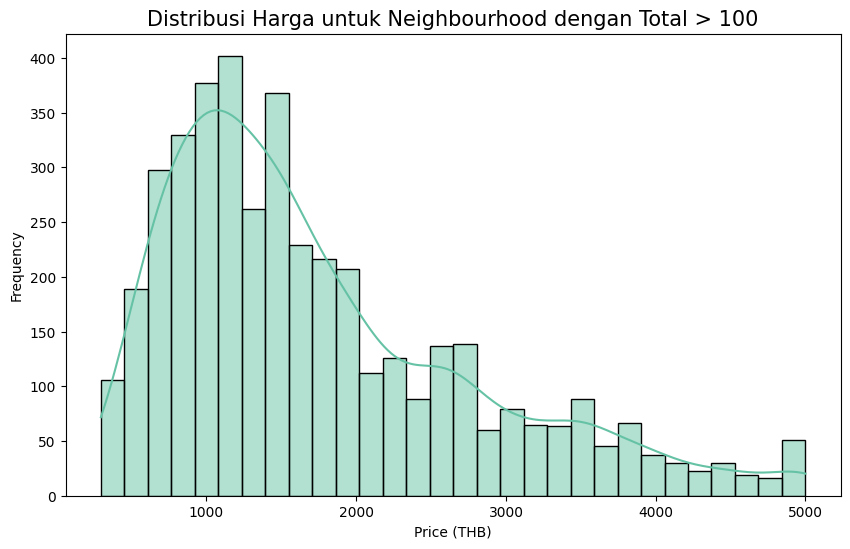

In [78]:
# Membuat histogram distribusi price untuk neighbourhood yang sudah difilter
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='price', bins=30, kde=True)
plt.title('Distribusi Harga untuk Neighbourhood dengan Total > 100', size=15)
plt.xlabel('Price (THB)')
plt.ylabel('Frequency')
plt.show()

In [119]:
stats, pval = normaltest(df_filtered['price'])
if pval <= 0.05:
    print('  Hasil: Tidak normal ')
else:
    print('  Hasil: Distribusi normal ')

  Hasil: Tidak normal 


Berdasarkan hasil uji normalitas untuk variabel harga `price`, kita menemukan bahwa distribusi harga tidak mengikuti distribusi normal. Ini berarti bahwa data harga cenderung memiliki skewness atau kurtosis yang signifikan, yang dapat mempengaruhi analisis statistik selanjutnya jika tidak ditangani dengan tepat.

Distribusi harga yang tidak normal dapat disebabkan oleh berbagai faktor, seperti adanya outliers atau pola harga yang sangat bervariasi di berbagai properti dan lokasi. Kondisi ini mungkin mencerminkan kenyataan pasar di mana beberapa properti memiliki harga yang jauh lebih tinggi atau lebih rendah dibandingkan mayoritas properti lainnya.

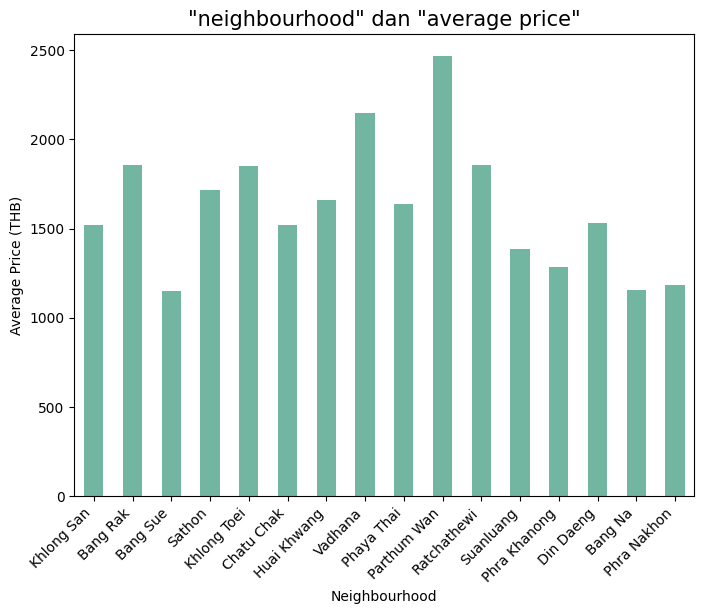

In [80]:
# Visualisasi rata-rata price dari neighbourhood yang sudah difilter
plt.figure(figsize=(8, 6))
sns.barplot(data=df_filtered, x='neighbourhood', y='price', ci=None, estimator=lambda x: x.mean(), width=0.5)
plt.title('"neighbourhood" dan "average price"', size=15)
plt.ylabel('Average Price (THB)')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.show()

* Parthum Wan memiliki harga rata-rata tertinggi di antara neighbourhood yang ditampilkan. Ini menunjukkan bahwa properti di kawasan Vadhana cenderung lebih mahal dibandingkan dengan kawasan lain.
* Bang Sue dan Bang Na memiliki harga rata-rata yang lebih rendah dibandingkan dengan kawasan lainnya. Ini menunjukkan bahwa properti di kawasan Chatu Chak dan Phra Khanong cenderung lebih murah.



In [81]:
# Uji Kruskal-Wallis untuk price berdasarkan neighbourhood
neighbourhood_groups = [df[df['neighbourhood'] == neighbourhood]['price'] for neighbourhood in df['neighbourhood'].unique()]
stat, pval = kruskal(*neighbourhood_groups)

if pval <= 0.05:
    print('Tolak H0 - Ada perbedaan signifikan dalam price antara neighbourhood')
else:
    print('Gagal menolak H0 - Tidak ada perbedaan signifikan dalam price antara neighbourhood')


Tolak H0 - Ada perbedaan signifikan dalam price antara neighbourhood


Ternyata, ada perbedaan yang signifikan dari segi harga di antara `neighbourhood` yang berbeda. Neighbourhood tertentu cenderung memiliki harga yang lebih tinggi, yang mungkin mencerminkan status mereka sebagai daerah yang lebih populer atau premium, dengan fasilitas yang lebih lengkap atau akses yang lebih mudah ke atraksi utama.

Selanjutnya, kita akan melihat average `availability` dan average `price` berdasarkan `neighbourhood`

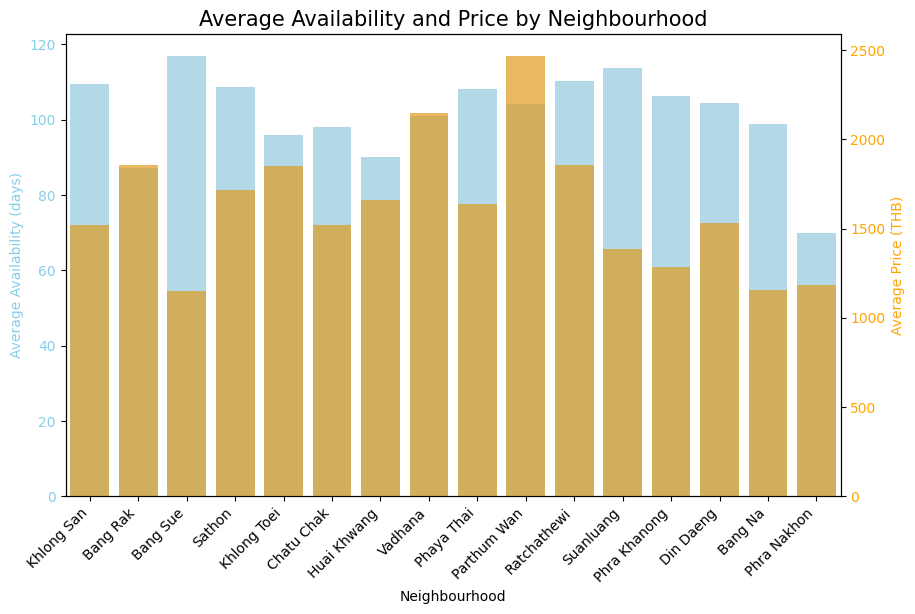

In [82]:
# Membuat figure dan axis utama
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot pertama untuk rata-rata availability_365
sns.barplot(data=df_filtered, x='neighbourhood', y='availability_365', ci=None, ax=ax1, color='skyblue', alpha=0.7)
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Average Availability (days)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Membuat axis kedua untuk rata-rata price
ax2 = ax1.twinx()
sns.barplot(data=df_filtered, x='neighbourhood', y='price', ci=None, ax=ax2, color='orange', alpha=0.7)
ax2.set_ylabel('Average Price (THB)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Average Availability and Price by Neighbourhood', size=15)
plt.show()

###Ketersediaan yang Tinggi dengan Harga yang Relatif Rendah:

`Bang Sue` dan `Ratchathewi` menunjukkan ketersediaan yang tinggi (di atas 100 hari), tetapi harga rata-rata di daerah ini relatif lebih rendah dibandingkan dengan neighbourhood lainnya. Hal ini dapat mengindikasikan bahwa meskipun properti di daerah ini sering tersedia, harganya lebih terjangkau.

###Ketersediaan yang Rendah dengan Harga yang Lebih Tinggi:

`Phaya Thai` dan `Phra Nakhon` memiliki ketersediaan yang lebih rendah, namun harga rata-rata lebih tinggi. Ini mungkin menunjukkan bahwa daerah ini memiliki permintaan yang tinggi, sehingga ketersediaan lebih terbatas dan harga cenderung lebih tinggi.

###Ketersediaan dan Harga yang Seimbang:
`Khlong Toei`, `Chatu Chak`, dan `Huai Khwang` menunjukkan keseimbangan antara harga dan ketersediaan, di mana keduanya berada pada tingkat sedang. Ini bisa berarti daerah ini memiliki penawaran yang cukup stabil antara harga dan ketersediaan properti.

###Anomali atau Outliers:
`Bang Na` dan `Phra Nakhon` menunjukkan ketersediaan yang cukup tinggi tetapi harga yang jauh lebih rendah dibandingkan dengan neighbourhood lain yang memiliki ketersediaan serupa. Ini bisa menjadi indikasi adanya faktor lain yang mempengaruhi harga, seperti kurangnya fasilitas atau daya tarik lokasi.

## Fasilitas (`room_type`)



Tipe akomodasi yang paling sering disewa adalah entire home/apt, yang menunjukkan preferensi pengunjung untuk menyewa tempat tinggal yang lebih privat dan lengkap. Grafik di atas mengilustrasikan bahwa proporsi sewa untuk entire home/apt jauh lebih tinggi dibandingkan dengan tipe akomodasi lain seperti shared room atau private room.

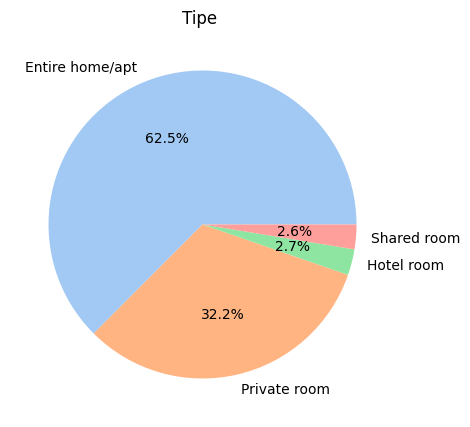

In [83]:
# Pie chart untuk distribusi room_type
plt.figure(figsize=(6, 5))
df['room_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Tipe ')
plt.ylabel('')  # Hide the ylabel
plt.show()

- Sebagian besar properti yang tersedia di Bangkok adalah `Entire home/apt`, yang mencakup 62.5% dari total properti. Ini menunjukkan bahwa mayoritas listing di Airbnb Bangkok adalah unit yang memberikan akses penuh kepada tamu, seperti apartemen atau rumah yang bisa digunakan secara eksklusif tanpa berbagi dengan orang lain. Jenis properti ini mungkin lebih disukai oleh wisatawan yang mencari privasi dan kenyamanan selama mereka tinggal.

- `Private room` adalah jenis akomodasi kedua yang paling umum, dengan 32.2% dari total properti. Jenis akomodasi ini memungkinkan tamu untuk menyewa kamar pribadi di sebuah rumah atau apartemen, sementara mungkin berbagi fasilitas umum seperti dapur atau kamar mandi dengan tuan rumah atau tamu lainnya. Pilihan ini cocok untuk wisatawan yang mencari akomodasi yang lebih terjangkau tetapi tetap ingin memiliki privasi di kamar mereka.

- `Hotel room` dan `Shared room` merupakan jenis akomodasi yang paling sedikit tersedia, masing-masing hanya mencakup 2.7% dan 2.6% dari total properti. `Hotel room` menawarkan pengalaman seperti hotel yang lebih tradisional, sementara `Shared room` adalah pilihan paling hemat, di mana tamu berbagi ruang tidur dengan tamu lain. Ketersediaan yang rendah dari kedua jenis ini menunjukkan bahwa mereka mungkin tidak begitu populer di kalangan pengguna Airbnb di Bangkok, atau memang tidak banyak ditawarkan oleh tuan rumah.

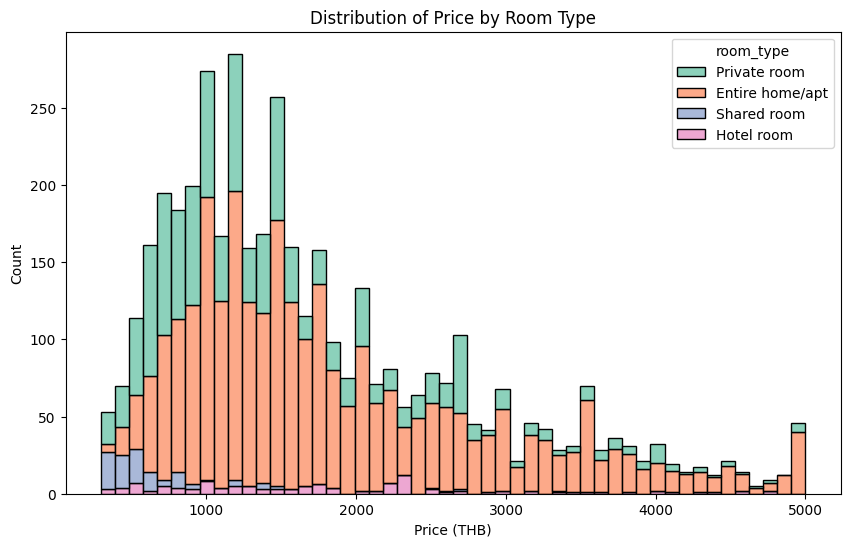

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='price', hue='room_type', multiple='stack', bins=50)
plt.title('Distribution of Price by Room Type')
plt.xlabel('Price (THB)')
plt.ylabel('Count')
plt.show()

In [85]:
room_type_groups = [df[df['room_type'] == room]['price'] for room in df['room_type'].unique()]
stat, pval = kruskal(*room_type_groups)

if pval <= 0.05:
    print('Tolak H0 - Ada perbedaan signifikan dalam price antara room_type')
else:
    print('Gagal menolak H0 - Tidak ada perbedaan signifikan dalam price antara room_type')

Tolak H0 - Ada perbedaan signifikan dalam price antara room_type


Analisis menunjukkan bahwa harga (price) antara berbagai room_type di Airbnb Bangkok berbeda secara signifikan. Ini berarti bahwa tipe kamar yang ditawarkan—seperti Entire Home/Apt, Private Room, Shared Room, dan Hotel Room—mempengaruhi harga sewa secara nyata.

Tipe Entire Home/Apt cenderung memiliki harga yang lebih tinggi dibandingkan dengan Private Room dan Shared Room, karena menawarkan privasi dan ruang yang lebih luas kepada tamu. Hotel Room, meskipun seringkali lebih mahal daripada Private Room, dapat bervariasi tergantung pada fasilitas dan lokasi hotel. Shared Room biasanya memiliki harga yang paling terjangkau, mencerminkan ruang bersama yang lebih terbatas dan kurangnya privasi dibandingkan tipe kamar lainnya.

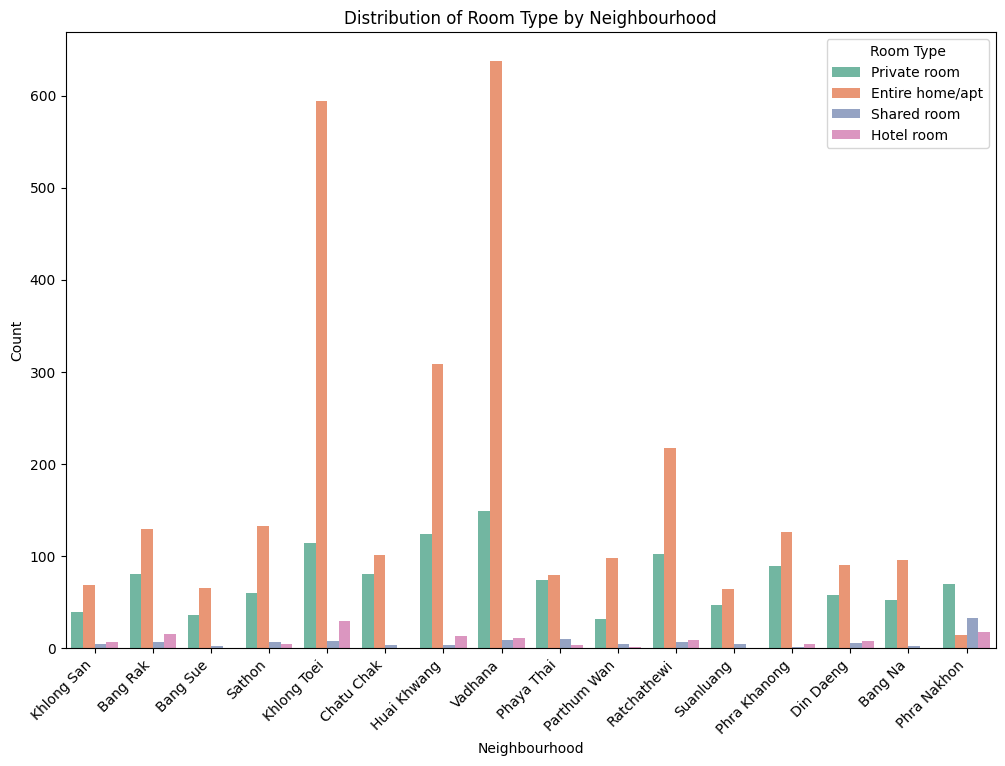

In [86]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_filtered, x='neighbourhood', hue='room_type')
plt.title('Distribution of Room Type by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Room Type')
plt.show()

In [97]:
import scipy.stats as ss

contingency_table = pd.crosstab(df['neighbourhood'], df['room_type'])
chi2, pval, dof, expected = ss.chi2_contingency(contingency_table)

if pval <= 0.05:
    print('Tolak H0 - Ada hubungan signifikan antara neighbourhood dan room_type')
else:
    print('Gagal menolak H0 - Tidak ada hubungan signifikan antara neighbourhood dan room_type')

Tolak H0 - Ada hubungan signifikan antara neighbourhood dan room_type


Hasil analisis menunjukkan bahwa terdapat hubungan yang signifikan antara `neighbourhood` dan `room_type`. Ini berarti bahwa jenis kamar yang tersedia di Airbnb Bangkok tidak didistribusikan secara merata di semua `neighbourhood`.

Beberapa `neighbourhood` mungkin lebih cenderung menawarkan tipe kamar tertentu, seperti Entire Home/Apt atau Private Room, yang bisa mencerminkan karakteristik demografis atau preferensi pengunjung di area tersebut.

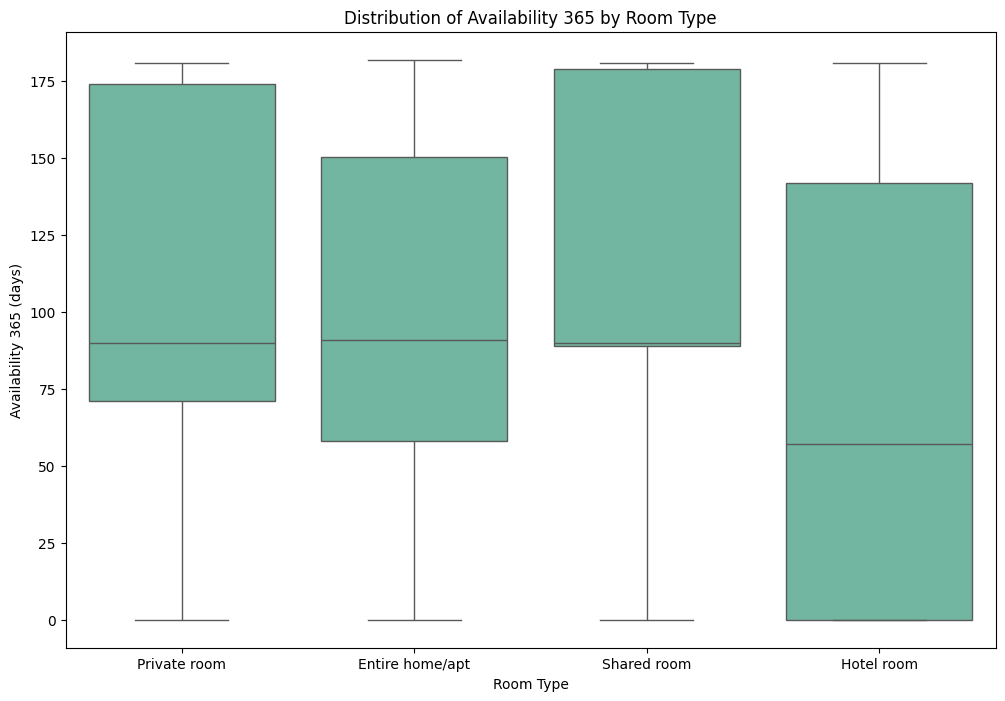

In [98]:
plt.figure(figsize=(12, 8))

# Menggunakan boxplot untuk melihat distribusi availability_365 by room_type
sns.boxplot(data=df_filtered, x='room_type', y='availability_365')
plt.title('Distribution of Availability 365 by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability 365 (days)')
plt.show()

Secara keseluruhan, `Private Room` dan cenderung memiliki distribusi yang menunjukkan ketersediaan lebih lama dalam setahun, dengan `Shared Room` memiliki rentang yang paling luas di kuartil atas. `Entire Home/Ap` memiliki distribusi yang sedikit lebih sempit dibandingkan `Private Room` dan `Shared Room`, menunjukkan bahwa properti jenis ini mungkin lebih terbatas dalam ketersediaannya.

`Hotel Room` memiliki distribusi yang paling beragam, dengan banyak properti yang tidak tersedia sama sekali sepanjang tahun, tetapi beberapa tersedia hingga setengah tahun atau lebih. Secara keseluruhan, distribusi ini menunjukkan bahwa Shared Room dan Private Room cenderung lebih sering tersedia untuk jangka waktu yang lebih lama, sementara Hotel Room dan Entire Home/Apt memiliki ketersediaan yang lebih terbatas dan bervariasi.

In [99]:
# Uji Kruskal-Wallis untuk availability_365 berdasarkan room_type
room_type_groups = [df[df['room_type'] == room]['availability_365'] for room in df['room_type'].unique()]
stat, pval = kruskal(*room_type_groups)

if pval <= 0.05:
    print('Tolak H0 - Ada perbedaan signifikan dalam availability_365 antara room_type')
else:
    print('Gagal menolak H0 - Tidak ada perbedaan signifikan dalam availability_365 antara room_type')

Tolak H0 - Ada perbedaan signifikan dalam availability_365 antara room_type



Berdasarkan hasil uji hipotesis, kita menolak H0 yang menyatakan bahwa tidak ada perbedaan signifikan dalam `availability_365` antara jenis-jenis akomodasi `room_type`. Ini menunjukkan bahwa terdapat perbedaan yang signifikan dalam jumlah hari ketersediaan `availability_365` antara tipe-tipe kamar yang berbeda seperti `Entire home/apt`, `Private room`, `Hotel room`, dan `Shared room`.

Hal ini dapat diinterpretasikan bahwa tipe akomodasi tertentu cenderung lebih tersedia atau lebih sering dipesan daripada yang lain. Misalnya, `Entire home/apt` mungkin memiliki ketersediaan yang lebih rendah karena lebih populer di kalangan tamu, atau Shared room mungkin lebih sering tersedia karena kurang diminati. Perbedaan ini penting untuk diperhatikan oleh pemilik properti dan penyewa potensial, karena pilihan tipe kamar dapat memengaruhi peluang ketersediaan sepanjang tahun.

## Correlation

In [114]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df_filtered['neighbourhood'] = label_encoder.fit_transform(df_filtered['neighbourhood'])
df_filtered['room_type'] = label_encoder.fit_transform(df_filtered['room_type'])

corr_spearman = df_filtered[['price', 'availability_365', 'neighbourhood', 'room_type']].corr(method='spearman')
corr_spearman

,price,availability_365,neighbourhood,room_type
price,1.000000,0.021179,0.170333,-0.262589
availability_365,0.021179,1.000000,0.034773,0.081367
neighbourhood,0.170333,0.034773,1.000000,-0.062864
room_type,-0.262589,0.081367,-0.062864,1.000000


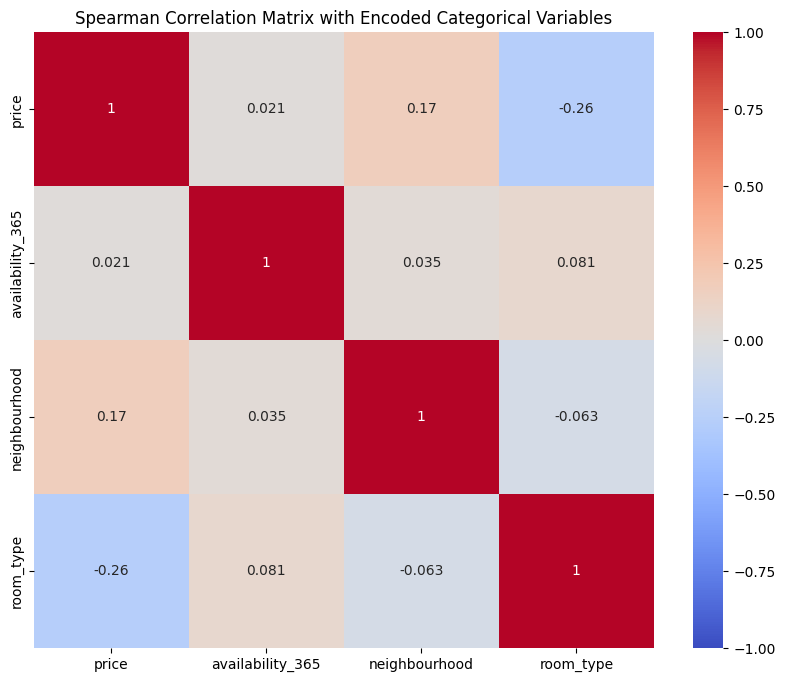

In [115]:
# Menampilkan hasil korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix with Encoded Categorical Variables')
plt.show()

###`Price` (Harga) dan `Room Type` (Tipe Kamar):

Terdapat korelasi negatif yang cukup kuat antara `price` dan `room_type` (-0.26). Ini menunjukkan bahwa jenis kamar tertentu mungkin cenderung memiliki harga yang lebih tinggi atau lebih rendah dibandingkan jenis kamar lainnya. Sebagai contoh, tipe kamar seperti "Entire home/apt" mungkin cenderung lebih mahal dibandingkan "Shared room" atau "Private room".

###`Price` (Harga) dan `Neighbourhood` (Kawasan):

Terdapat korelasi positif yang rendah antara `price` dan `neighbourhood` (0.17). Ini berarti kawasan tempat properti berada memiliki pengaruh kecil terhadap harga. Lokasi mungkin memainkan peran, tetapi tidak secara signifikan dalam menaikkan atau menurunkan harga.

### `Price` (Harga) dan `Availability_365`:

Korelasi antara `price` dan `availability_365` sangat rendah (0.021), menunjukkan bahwa harga tidak banyak mempengaruhi seberapa sering suatu properti tersedia selama setahun. Artinya, properti dengan harga yang lebih tinggi tidak selalu lebih sedikit tersedia atau lebih sering dipesan.

###`Availability_365` dan `Room Type` (Tipe Kamar):
Korelasi positif yang rendah antara `availability_365` dan `room_type` (0.081) menunjukkan bahwa tipe kamar sedikit memengaruhi ketersediaan properti sepanjang tahun. Namun, pengaruh ini tidak besar.

###`Availability_365` dan `Neighbourhood` (Kawasan):

Korelasi antara `availability_365` dan `neighbourhood` juga rendah (0.035), menunjukkan bahwa lokasi properti memiliki pengaruh yang sangat kecil terhadap seberapa sering properti tersebut tersedia.

###`Neighbourhood` dan `Room Type`:

Korelasi negatif yang sangat rendah antara `neighbourhood` dan `room_type` (-0.063) menunjukkan bahwa kawasan tempat properti berada tidak banyak mempengaruhi jenis kamar yang tersedia.

# Kesimpulan dan Rekomendasi

## Kesimpulan:


Distribusi Properti dan Ketersediaan:

Vadhana dan Khlong Toei adalah dua neighbourhood dengan jumlah listing terbanyak. Namun, ketersediaan (availability_365) sangat bervariasi di berbagai neighbourhood, dengan beberapa area menunjukkan tingkat ketersediaan yang lebih rendah, seperti Phaya Thai dan Phra Nakhon, yang mungkin mencerminkan demand yang lebih tinggi.

Harga dan Tipe Kamar:

Properti Entire home/apt memiliki persentase terbesar di Airbnb Bangkok, dan cenderung lebih mahal dibandingkan dengan tipe kamar lain seperti Private room atau Shared room.
Harga dan ketersediaan tidak menunjukkan korelasi yang signifikan, menunjukkan bahwa harga tidak selalu mempengaruhi seberapa sering properti tersedia.

Korelasi Antar Variabel:

Ada korelasi positif antara harga dan neighbourhood, meskipun rendah. Ini menunjukkan bahwa lokasi memiliki pengaruh kecil terhadap harga, namun cukup untuk menjadi faktor yang dipertimbangkan dalam penentuan harga.


## Rekomendasi:

Optimisasi Harga Berdasarkan Lokasi:

Airbnb dapat mendorong pemilik properti di area dengan demand tinggi seperti Phaya Thai dan Phra Nakhon untuk mempertahankan atau meningkatkan harga, terutama saat musim liburan atau peak season, untuk memaksimalkan revenue.
Di sisi lain, untuk kawasan dengan ketersediaan tinggi seperti Bang Sue dan Ratchathewi, strategi diskon atau penawaran promosi dapat digunakan untuk meningkatkan tingkat okupansi tanpa harus mengorbankan margin secara signifikan.

Diversifikasi Penawaran Akomodasi:

Mengingat dominasi Entire home/apt di pasar, Airbnb dapat menginformasikan tuan rumah untuk mempertimbangkan menambahkan lebih banyak Private room atau Shared room untuk menarik segmen pasar yang mencari akomodasi lebih ekonomis, yang dapat meningkatkan jumlah order tanpa harus bersaing di harga premium.

Strategi Ketersediaan Dinamis:

Airbnb dapat mengembangkan fitur manajemen ketersediaan dinamis yang memberikan rekomendasi kepada tuan rumah tentang kapan waktu terbaik untuk meningkatkan harga atau menawarkan promosi berdasarkan tingkat permintaan di masing-masing neighbourhood. Ini dapat membantu meningkatkan revenue dan meminimalkan waktu kosong (vacancy rate).

Dengan implementasi dari rekomendasi ini, diharapkan para pemilik properti Airbnb di Bangkok dapat meningkatkan efektivitas strategi mereka, baik dalam penetapan harga, pengelolaan ketersediaan, maupun penawaran jenis akomodasi yang sesuai dengan demand pasar.